# Evaluating Hyperparameters Part 1: Random Forest

### This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Data Wrangling
#### 3. Reshaping for Modeling
#### 4. Data Split
#### 5. Random Forest for All Weather Stations 2010s
  6. Hyperparameter Optimization
     - Grid Search
     - Random Search
  7. Running Random Forest with Optimized Search Parameters
  8. Feature Importances
#### 9. Random Forest for Individual Weather Station (Belgrade)
  10. Hyperparameter Optimization
    - Grid Search
    - Random Search
  11. Running Random Forest with Optimized Search Parameters
  12. Feature Importances

### 1. Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [5]:
# Define path
path = r'C:\Users\16307\Desktop\CareerFoundry\Tasks - Machine Learning\ClimateWins Analysis\Data Sets'

In [6]:
# Import cleaned data
df = pd.read_csv(os.path.join(path, 'unscaled_cleaned_with_date.csv'), index_col = False)

In [7]:
# Read in the pleasant weather data
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [8]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,KASSEL_cloud_cover,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_pressure,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,STOCKHOLM_humidity,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,8,9.4,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,1.0304,5,0.67,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,0.98,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,6,3.9,10.6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,1.0292,6,0.72,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,0.62,-8.5,5,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30

In [9]:
df.shape

(22950, 137)

In [10]:
pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
pleasant.shape

(22950, 16)

### 2. Data Wrangling
- Reduce data to one decade 2010s (2010-2019).

In [13]:
# Filter weather dataset to 2010s
df_2010s = df[df['DATE'].astype(str).str.startswith('201')] 
df_2010s

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,KASSEL_cloud_cover,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_pressure,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,STOCKHOLM_humidity,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,8,-0.5,5.0,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,1.0054,7,0.91,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,0.76,-7.9,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,8,-2.4,3.0,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,1.0250,6,0.86,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,0.74,-10.9,7,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,0.82,1.01

In [14]:
# Filter weather dataset to 2010s
pleasant_2010s = pleasant[pleasant['DATE'].astype(str).str.startswith('201')] 
pleasant_2010s

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Extract stations list
stations = [col.split('_')[0] for col in df_2010s.columns if '_' in col]

In [16]:
# Create a set of unique station names
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [17]:
# Drop unnecessary columns
df_2010s.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [18]:
df_2010s.shape 

(3652, 135)

In [19]:
# Drop unnecessary columns
pleasant_2010s.drop(columns = 'DATE', inplace = True)

In [20]:
pleasant_2010s.shape

(3652, 15)

### 3. Reshaping for Modeling

In [22]:
X = df_2010s

In [23]:
y = pleasant_2010s

In [24]:
# Turn X and y from into arrays
X = np.array(X)
y = np.array(y)

In [25]:
X.shape

(3652, 135)

In [26]:
y.shape

(3652, 15)

### 4. Data Split 

In [28]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


## 5. Random Forest for All Weather Stations 2010s

### 6. Hyperparameter Optimization

### Grid Search

In [33]:
# Create a RF classifier
clf = RandomForestClassifier()

In [34]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [35]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 21.850353113810222 minutes


In [36]:
# Print grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6418400876232201


### Random Search

In [38]:
# Define random search cv
rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'n_estimators': np.arange(150, 250, step=25),  # Focusing on around the best n_estimators
    'max_features': randint(30, 70),  # Adjusting to a narrower range based on grid search
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 4), 
    'min_samples_split': np.arange(2, 10, step=2) 
}

In [39]:
# Create a RF classifier
clf2= RandomForestClassifier()

In [40]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 2.922141698996226 minutes


In [41]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6418400876232201
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 90, 'max_features': 69, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 175}
Best RANDOM search score is: 0.6447608616283315


### 7. Running Random Forest with Optimized Search Parameters

In [43]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 150, max_depth=None, max_features=56, min_samples_leaf=1, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=56, n_estimators=150)

In [44]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6703176341730559


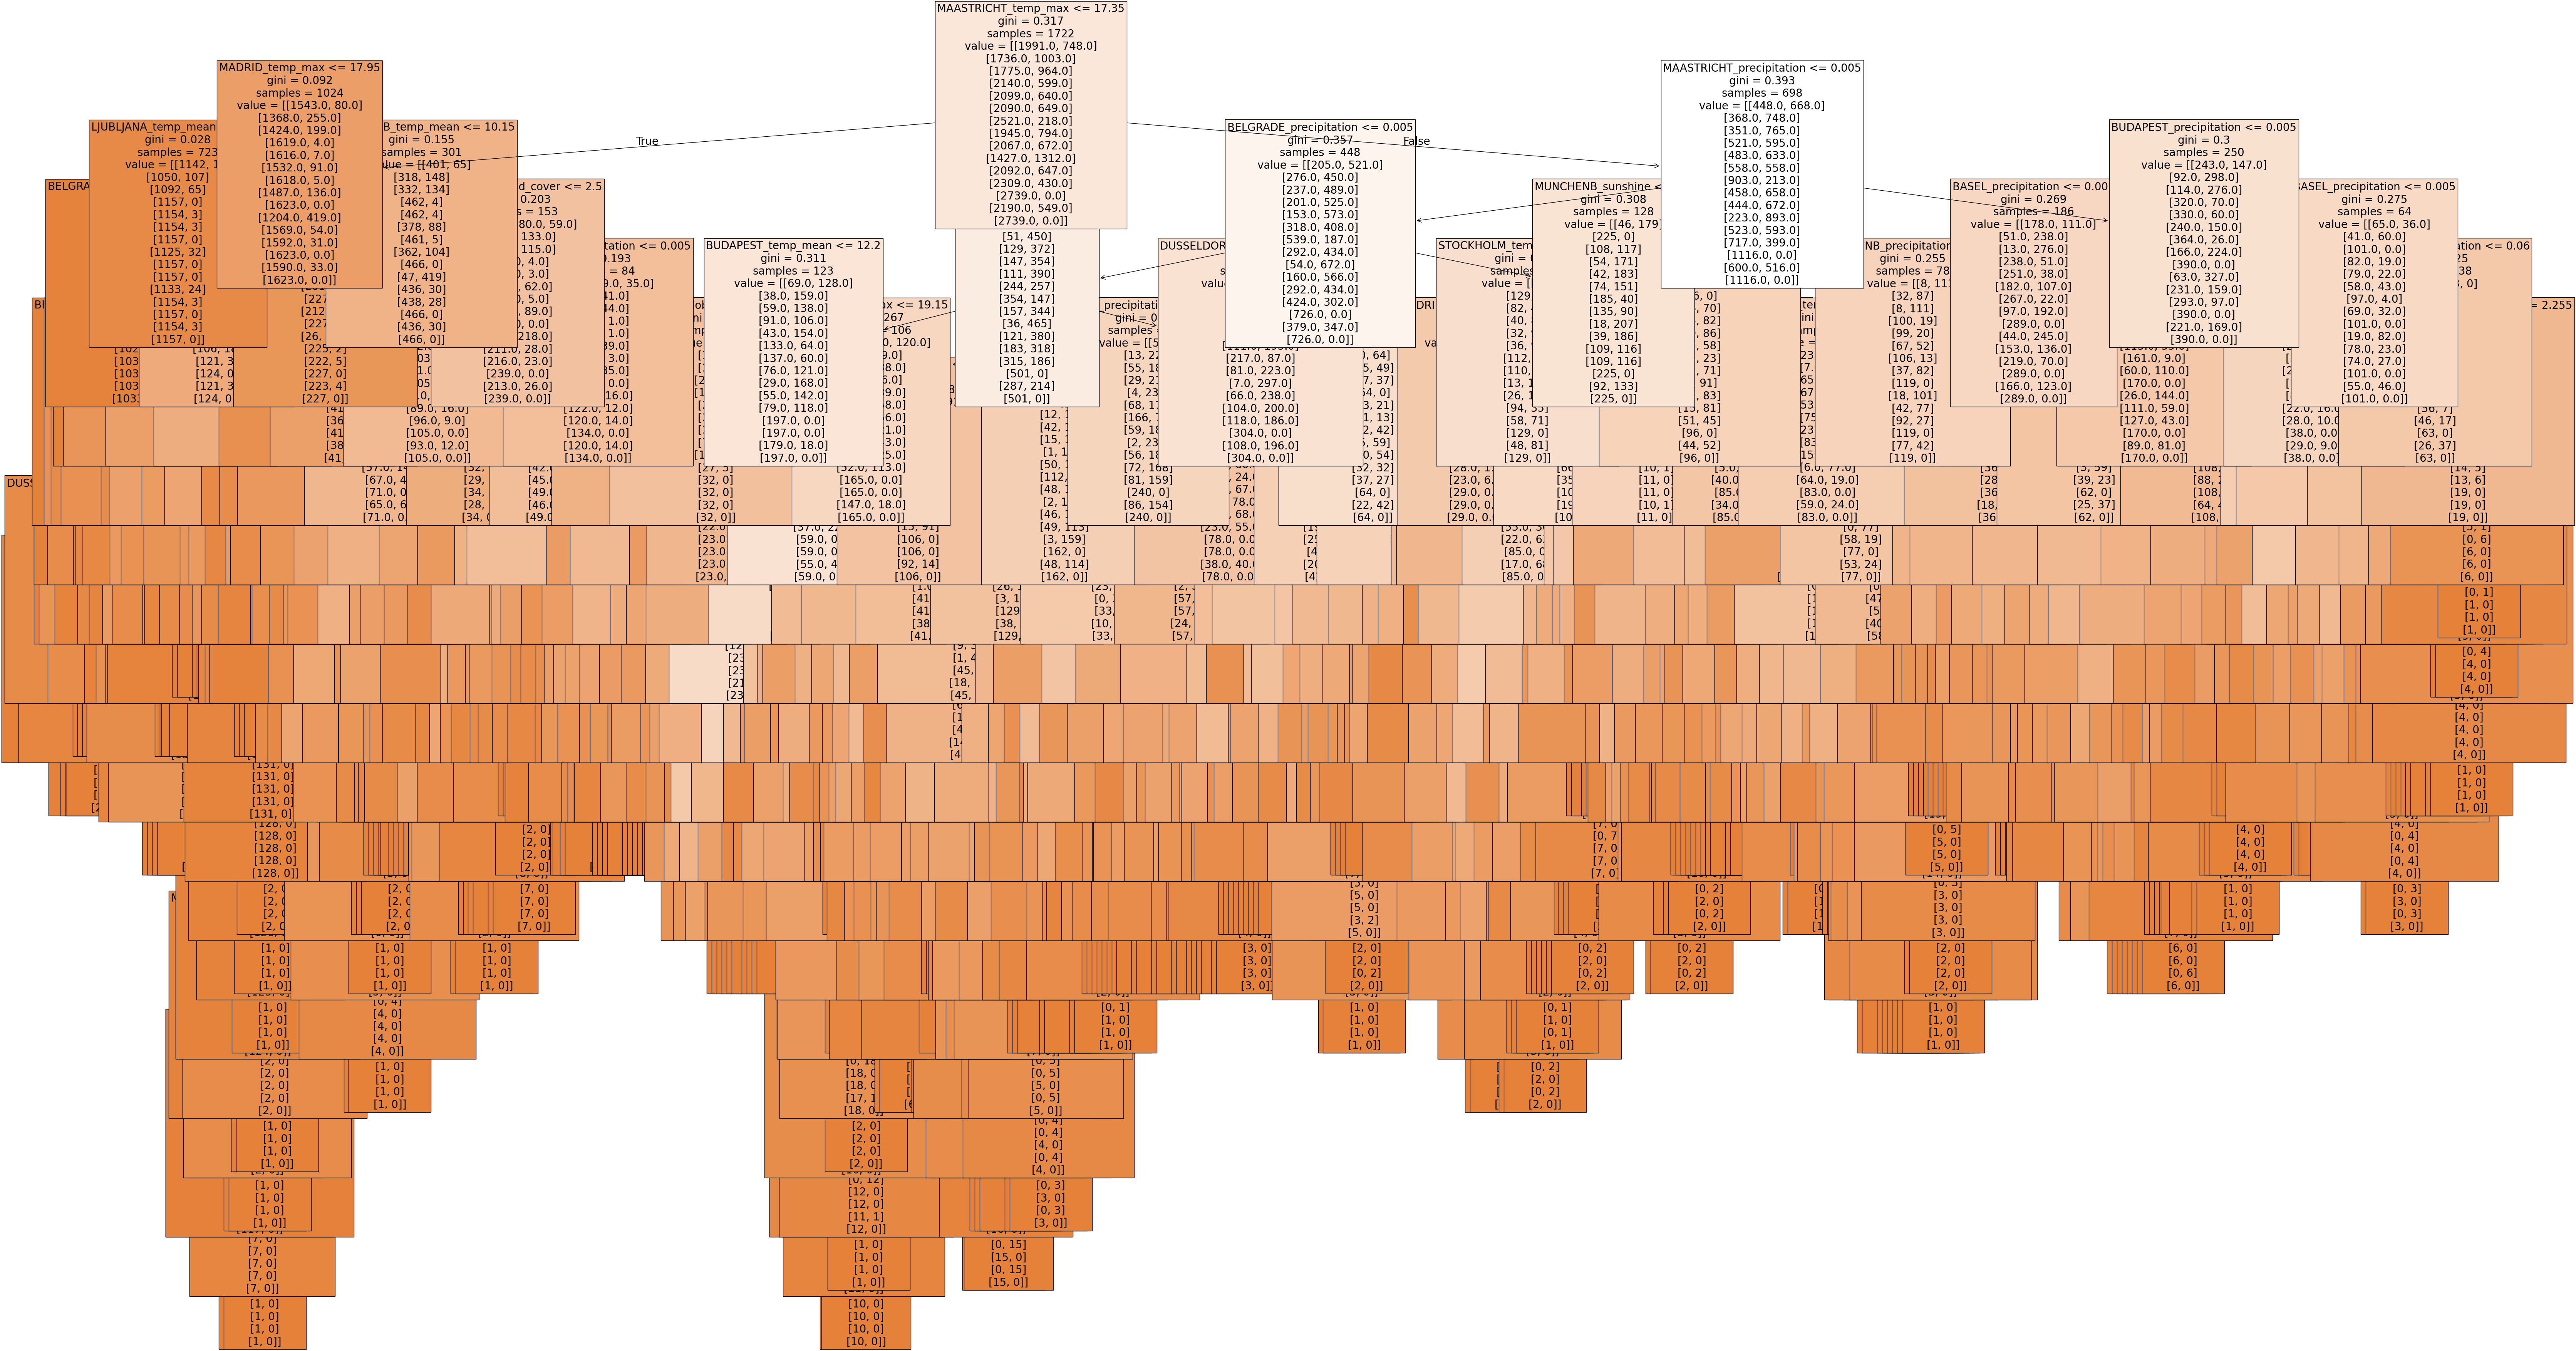

In [45]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = df_2010s.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [46]:
fig.savefig(os.path.join(path, 'optimized_random_forest_2010s.png'), bbox_inches='tight')

### 8. Feature Importances

In [48]:
newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.46151742e-03, 2.33620132e-03, 2.19590650e-03, 2.17754461e-03,
       3.11314684e-02, 4.16360422e-03, 8.61270006e-03, 1.76745203e-03,
       7.62059448e-02, 2.78629450e-03, 2.37387726e-03, 2.23584517e-03,
       2.01353858e-03, 2.66628323e-02, 2.17909359e-03, 3.93087037e-03,
       1.98840165e-03, 8.36351686e-03, 2.65236566e-04, 0.00000000e+00,
       0.00000000e+00, 8.30203064e-04, 2.64773098e-02, 1.00790966e-03,
       9.64521231e-03, 1.95687650e-03, 1.88072961e-02, 1.33337674e-03,
       1.94333945e-03, 2.03115441e-03, 2.51122258e-03, 2.08870952e-02,
       2.69408171e-03, 2.16309005e-03, 2.06376575e-03, 3.08610236e-02,
       1.32085517e-03, 1.76618659e-03, 2.11575006e-03, 2.00428265e-03,
       3.35921225e-02, 2.84037090e-03, 6.15424682e-03, 1.90330336e-03,
       1.25444755e-01, 2.09082712e-03, 3.40338948e-03, 2.28148329e-03,
       3.56458522e-03, 1.40137280e-02, 3.62946025e-03, 4.73564509e-03,
       1.71725218e-03, 2.13454066e-03, 8.97824146e-03, 1.50414533e-03,
      

In [49]:
# Reshape newarray
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.46151742e-03, 2.33620132e-03, 2.19590650e-03, 2.17754461e-03,
         3.11314684e-02, 4.16360422e-03, 8.61270006e-03, 1.76745203e-03,
         7.62059448e-02],
        [2.78629450e-03, 2.37387726e-03, 2.23584517e-03, 2.01353858e-03,
         2.66628323e-02, 2.17909359e-03, 3.93087037e-03, 1.98840165e-03,
         8.36351686e-03],
        [2.65236566e-04, 0.00000000e+00, 0.00000000e+00, 8.30203064e-04,
         2.64773098e-02, 1.00790966e-03, 9.64521231e-03, 1.95687650e-03,
         1.88072961e-02],
        [1.33337674e-03, 1.94333945e-03, 2.03115441e-03, 2.51122258e-03,
         2.08870952e-02, 2.69408171e-03, 2.16309005e-03, 2.06376575e-03,
         3.08610236e-02],
        [1.32085517e-03, 1.76618659e-03, 2.11575006e-03, 2.00428265e-03,
         3.35921225e-02, 2.84037090e-03, 6.15424682e-03, 1.90330336e-03,
         1.25444755e-01],
        [2.09082712e-03, 3.40338948e-03, 2.28148329e-03, 3.56458522e-03,
         1.40137280e-02, 3.62946025e-03, 4.73564509e-03, 1.71725218

In [50]:
# Collapse this shape into one observation for each weather station
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.13005234, 0.05253427, 0.05899004, 0.06648815, 0.17714187,
       0.03757091, 0.03364214, 0.07146311, 0.12510449, 0.07495544,
       0.07020836, 0.04382983, 0.01746212, 0.03751624, 0.00304069])

In [51]:
# Convert the set of unique stations to a list
unique_stations_list = list(unique_stations)

In [52]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

DUSSELDORF    0.177142
MAASTRICHT    0.130052
MADRID        0.125104
BASEL         0.074955
BELGRADE      0.071463
STOCKHOLM     0.070208
KASSEL        0.066488
SONNBLICK     0.058990
LJUBLJANA     0.052534
BUDAPEST      0.043830
MUNCHENB      0.037571
HEATHROW      0.037516
DEBILT        0.033642
OSLO          0.017462
VALENTIA      0.003041
dtype: float64

In [53]:
# Create a df to associate weather stations with their importances
df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['MAASTRICHT', 'LJUBLJANA', 'SONNBLICK', 'KASSEL', 'DUSSELDORF', 'MUNCHENB', 'DEBILT', 'BELGRADE', 'MADRID', 'BASEL', 'STOCKHOLM', 'BUDAPEST', 'OSLO', 'HEATHROW', 'VALENTIA']


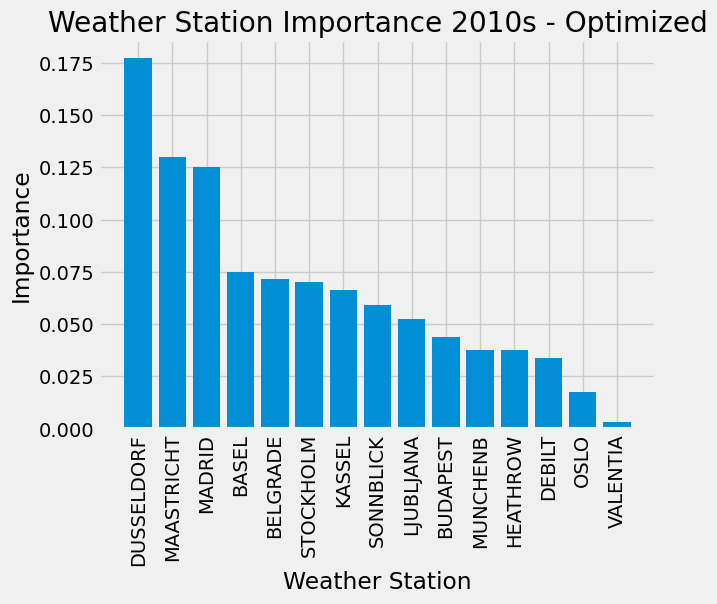

In [54]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.savefig(os.path.join(path, 'optimized_featureimportance_2010s.png'), bbox_inches='tight')

plt.show()

## 9. Random Forest for Individual Weather Station (Belgrade)

In [75]:
# Filter weather dataset to only include Dusseldorf
df_dusseldorf = df[df.columns[df.columns.astype(str).str.startswith('DUSSELDORF')]]
df_dusseldorf

,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max
0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5
1,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0
2,7,0.95,1.0161,0.12,0.07,0.0,7.1,6.9,9.1
3,8,0.86,1.0161,0.12,0.02,0.0,6.8,3.6,8.0
4,7,0.92,1.0161,0.12,0.62,0.0,7.7,6.2,11.0
...,...,...,...,...,...,...,...,...,...
22945,8,0.75,1.0214,1.13,0.20,6.4,17.8,13.6,21.4
22946,7,0.71,1.0186,1.13,0.20,4.9,19.4,15.4,23.9
22947,8,0.73,1.0196,1.13,0.20,4.0,18.2,13.4,22.0
22948,7,0.73,1.0176,1.13,0.20,6.9,16.7,11.9,21.1


In [76]:
# Filter pleasant dataset to only include Dusseldorf
pleasant_dusseldorf = pleasant[pleasant.columns[pleasant.columns.astype(str).str.startswith('DUSSELDORF')]]
pleasant_dusseldorf

,DUSSELDORF_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [77]:
# Create matrices
y2 = pleasant_dusseldorf.max(axis=1)
y2.shape

(22950,)

In [78]:
# Ensure y has the correct shape
y2 = y2.to_numpy().reshape(-1)
y2.shape

(22950,)

In [79]:
# Create X matrix
X2 = df_dusseldorf.to_numpy()

# Check shapes of the matrices
print(X2.shape)
print(y2.shape)

(22950, 9)
(22950,)


In [80]:
# Turn X2 and y2 from df to arrays
X = np.array(X2)
y = np.array(y2)

In [81]:
X.shape

(22950, 9)

In [82]:
y.shape

(22950,)

In [83]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [84]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [85]:
X_train

array([[  3.    ,   0.63  ,   1.0153, ...,  18.8   ,   9.9   ,  24.    ],
       [  3.    ,   0.75  ,   1.0172, ...,  -3.6   ,  -6.3   ,  -1.2   ],
       [  4.    ,   0.91  ,   1.0108, ...,  -5.4   , -11.9   ,  -2.6   ],
       ...,
       [  8.    ,   0.84  ,   1.0098, ...,   8.6   ,   5.1   ,  10.2   ],
       [  7.    ,   0.77  ,   1.0161, ...,  11.6   ,   8.2   ,  15.3   ],
       [  2.    ,   0.64  ,   1.0243, ...,   7.6   ,   1.    ,  14.    ]])

In [86]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
X_test

array([[ 3.    ,  0.74  ,  1.0161, ..., 12.6   ,  6.9   , 19.5   ],
       [ 7.    ,  0.56  ,  1.0102, ...,  2.2   ,  0.7   ,  5.4   ],
       [ 8.    ,  0.78  ,  1.0077, ..., 18.2   , 17.3   , 20.8   ],
       ...,
       [ 1.    ,  0.8   ,  1.0133, ..., 11.3   ,  4.    , 20.8   ],
       [ 7.    ,  0.77  ,  1.0259, ...,  7.4   ,  6.2   ,  9.1   ],
       [ 8.    ,  0.88  ,  1.0196, ..., 11.4   ,  7.4   , 14.3   ]])

In [88]:
y_test

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### 10. Hyperparameter Optimization

### Grid Search

In [91]:
# Create a RF classifier
clf = RandomForestClassifier()

In [92]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [93]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 2.1024288455645244 minutes


In [94]:
# Print grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0


### Random Search

In [96]:
# Define random search cv
rs_space = {
    'max_depth': list(np.arange(1, 10, step=1)) + [None],  
    'n_estimators': np.arange(100, 300, step=50),  
    'max_features': randint(2, 5),  
    'criterion': ['gini', 'entropy'],  
    'min_samples_leaf': randint(1, 4),  
    'min_samples_split': np.arange(2, 10, step=2)  
}

In [97]:
# Create a RF classifier
clf2= RandomForestClassifier()

In [98]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=100, scoring='accuracy', verbose=3, n_jobs=-1, cv=5)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Search took 2.083321495850881 minutes


In [99]:
# Random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best RANDOM search score is: 1.0


In [100]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best RANDOM search score is: 1.0


### 11. Running Random Forest with Optimized Search Parameters

In [102]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 250, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=2, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=2, min_samples_leaf=2,
                       n_estimators=250)

In [103]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  0.9998257232485186


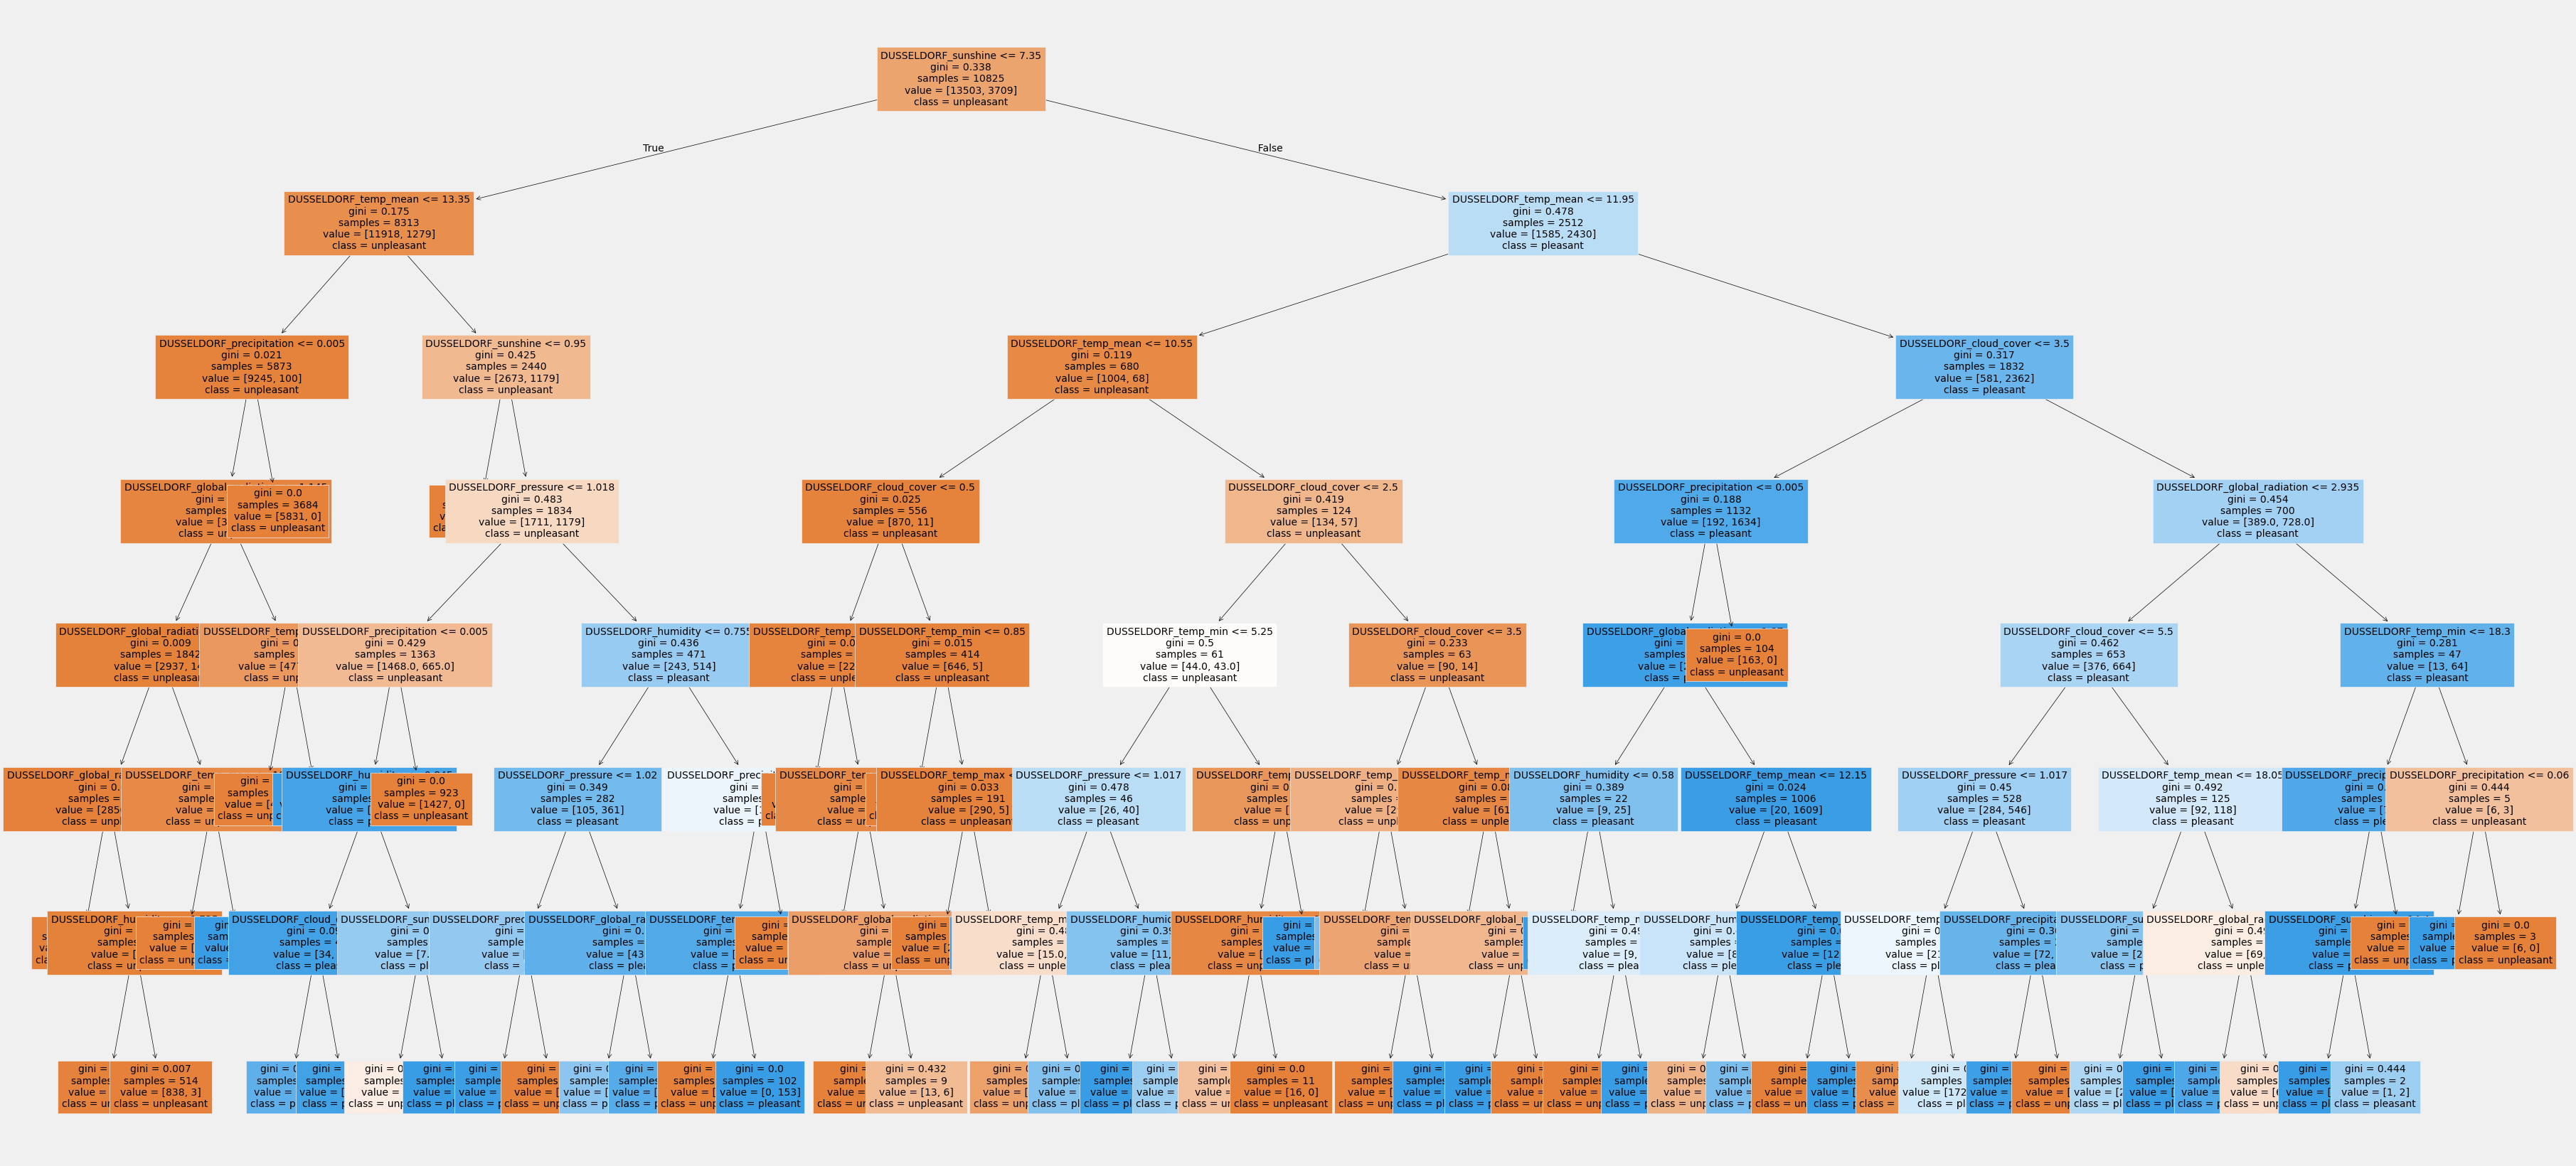

In [104]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(40,20))
plot_tree(clf3.estimators_[6], fontsize = 10, feature_names = df_dusseldorf.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [105]:
fig.savefig(os.path.join(path, 'optimized_random_forest_dusseldorf.png'),bbox_inches='tight')

### 12. Feature Importances

In [107]:
newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([0.04094256, 0.02846216, 0.01659762, 0.10139903, 0.28548028,
       0.1057585 , 0.15176274, 0.03149466, 0.23810246])

In [108]:
# Retrieve feature importances from the trained model
dusseldorf_importance = clf3.feature_importances_
print("Feature Importances:", dusseldorf_importance)
print(dusseldorf_importance.shape)

Feature Importances: [0.04094256 0.02846216 0.01659762 0.10139903 0.28548028 0.1057585
 0.15176274 0.03149466 0.23810246]
(9,)


In [109]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [110]:
# Create a dataframe to associate observation measurements with their importances
dusseldorf_importance = pd.DataFrame({
    'Measurement': measurements,
    'Importance': dusseldorf_importance
})

In [111]:
# Sort by importance for chart readability
dusseldorf_importance = dusseldorf_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(dusseldorf_importance)

Feature Importance:
        Measurement  Importance
4     precipitation    0.285480
8          temp_max    0.238102
6         temp_mean    0.151763
5          sunshine    0.105759
3  global_radiation    0.101399
0       cloud_cover    0.040943
7          temp_min    0.031495
1          humidity    0.028462
2          pressure    0.016598


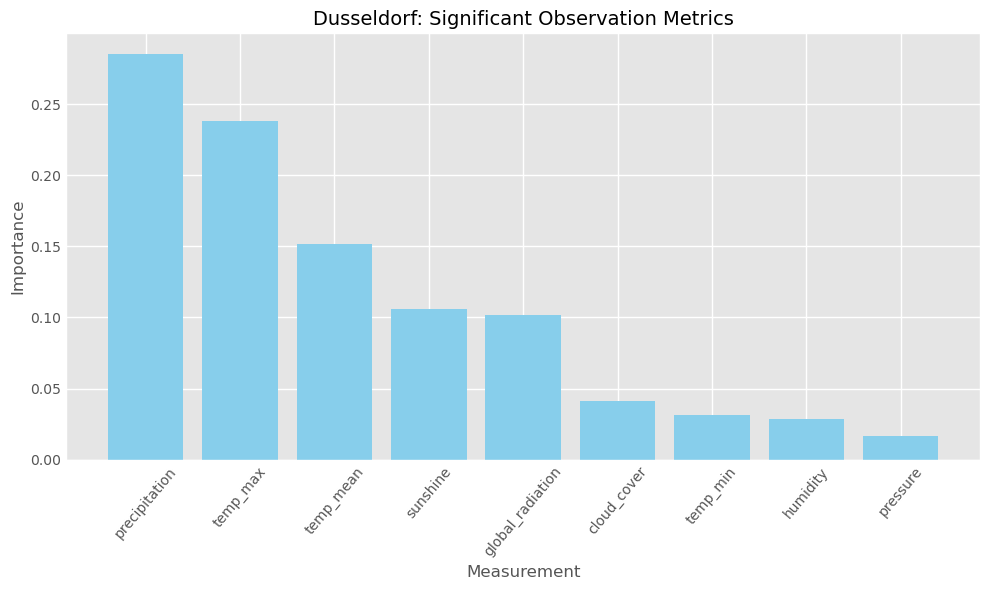

In [112]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(dusseldorf_importance['Measurement'], dusseldorf_importance['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Dusseldorf: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()